In [9]:
from typing import Tuple
K.<a> = QQ[2*cos(2*pi/7)]

def rotate(d: Tuple[K, K], n: Zmod(7) = 1) -> Tuple[K, K]:
    x, y = d
    if n == 0:
        return (x, y)
    if n == 1:
        return ((a)*x + y + 1, -x)
    if n == 2:
        return ((a^2 - 1)*x + (a)*y + (a + 1), (-a)*x - y - 1)
    if n == 3:
        return ((-a^2 + 1)*x + (a^2 - 1)*y + (a^2 + a), (-a^2 + 1)*x + (-a)*y + (-a - 1))
    if n == 4:
        return ((-a)*x + (-a^2 + 1)*y + (a + 1), (a^2 - 1)*x + (-a^2 + 1)*y + (-a^2 - a))
    if n == 5:
        return (-x + (-a)*y + 1, (a)*x + (a^2 - 1)*y + (-a - 1))
    return (-y, x + (a)*y - 1)


DOTS = [rotate((0, 0), i) for i in range(7)]


def ob(d: Tuple[K, K]) -> Tuple[K, K]:
    x, y = d
    for i in Zmod(7):
        if x > 0 and y > 0:
            return rotate((-x, -y), -i)
        x, y = rotate((x, y))
    raise NotImplementedError()


def ob_inv(d: Tuple[K, K]) -> Tuple[K, K]:
    x, y = d
    for i in Zmod(7):
        if x < 0 and y < 0:
            return rotate((-x, -y), -i)
        x, y = rotate((x, y))
    return (x, y)


# находит номер области, соответствующий номеру точки, относительно
# которой отражает ob
def locate_dot(dot: Tuple[K, K]):
    x, y = dot
    for i in Zmod(7):
        if x > 0 and y > 0:
            return f"{i}"
        x, y = rotate((x, y))

    raise NotImplementedError()


# генератор орбиты
# лучше глянуть пример в examples.ipynb
def orbit_ob(d: Tuple[K, K], n):
    for _ in range(n):
        yield d
        d = ob(d)


# маршрут
def trace_ob(d: Tuple[K, K], n):
    return "".join([locate_dot(i) for i in orbit_ob(d, n)])


def r2k(r: RR) -> K:
    return K(r.nearby_rational(max_error=0.0001))

SIN = sin(2*pi/7)
COS = cos(2*pi/7)
CTG = cot(2*pi/7)

def n2o(d: Tuple[K, K]) -> Tuple[RR, RR]:
    x, y = map(RR, d)
    return (x, RR(COS*x + SIN*y))


def o2n(d: Tuple[RR, RR]) -> Tuple[K, K]:
    x, y = d
    return (r2k(x), r2k(RR(-CTG*x + y/SIN)))

In [10]:
import plotly.graph_objects as go
from sage.geometry.polyhedron.plot import cyclic_sort_vertices_2d


def intersect_polygons(poly1, poly2):
    poly3 = poly1.intersection(poly2)
    
    if len(poly3.vertices()) > 2:
        return {poly3}
    
    return set()
    

def router(d: Tuple[K, K]):
    try:
        return trace_ob(d, 28)
    except NotImplementedError:
        return "0"

def plot_polygon(_poly):
    poly = tuple(map(tuple, cyclic_sort_vertices_2d(_poly.vertices())))
    N = K(len(poly))
    x, y = zip(*poly)
    it = router((sum(x)/N, sum(y)/N))
    poly = tuple(poly) + (poly[0],)
    x_, y_ = zip(*map(n2o, poly))
    return go.Scatter(x=x_, y=y_, name=it, fill="toself", mode="lines")

def rotated_polygons(polygons):
    for polygon in polygons:
        for i in range(1, 7):
            yield Polyhedron(vertices=tuple(rotate(tuple(d), i) for d in polygon.vertices()))

In [22]:
from tqdm.notebook import tqdm_notebook

SIZE = 10
ITERATIONS = 5

polygons = {Polyhedron(vertices=((0, 0), (0, SIZE), (SIZE, 0)))}

for i in tqdm_notebook(range(ITERATIONS)):
    new_polys = set()
    for rpoly in rotated_polygons(polygons):
        for poly in polygons:
            new_polys.update(intersect_polygons(poly, -rpoly))
    polygons = new_polys

  0%|          | 0/5 [00:00<?, ?it/s]

In [25]:
new_polys = set()
for rpoly in rotated_polygons(polygons):
    for poly in polygons:
        new_polys.update(intersect_polygons(poly, -rpoly))
polygons = new_polys

KeyboardInterrupt: 

In [26]:
layout = go.Layout(width=800, height=800)

f = go.FigureWidget([plot_polygon(Polyhedron(vertices=DOTS))], layout=layout)

for polygon in polygons:
    f.add_trace(plot_polygon(polygon))

for polygon in rotated_polygons(polygons):
    f.add_trace(plot_polygon(polygon))

f

FigureWidget({
    'data': [{'fill': 'toself',
              'mode': 'lines',
              'name': '0',
     …

In [24]:
f.write_html('7gon_final_form.html')

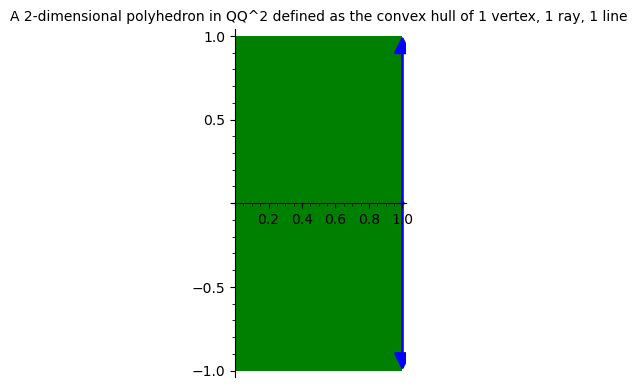

In [49]:
Polyhedron(ieqs=[(1, -1, 0)])

In [47]:
Polyhedron(vertices=[(0, 0), (1, 0), (0, 1)]).intersection(Polyhedron(ieqs=[(-1, 1, 0)]))

(A vertex at (1, 0),)

In [51]:
t = Polyhedron(vertices=[])
t.vertices()

()

In [30]:
def rotate_line(l: Tuple[K, K, K], n: Zmod(7) = 1) -> Tuple[K, K, K]:
    C1, C2, C3 = l
    if n == 0:
        return (C1, C2, C3)
    if n == 1:
        return (C2, -C1 + (a)*C2, -C2 + C3)
    if n == 2:
        return (-C1 + (a)*C2, (-a)*C1 + (a^2 - 1)*C2, C1 + (-a - 1)*C2 + C3)
    if n == 3:
        return ((-a)*C1 + (a^2 - 1)*C2, (-a^2 + 1)*C1 + (-a^2 + 1)*C2, (a + 1)*C1 + (-a^2 - a)*C2 + C3)
    if n == 4:
        return ((-a^2 + 1)*C1 + (-a^2 + 1)*C2, (a^2 - 1)*C1 + (-a)*C2, (a^2 + a)*C1 + (-a - 1)*C2 + C3)
    if n == 5:
        return ((a^2 - 1)*C1 + (-a)*C2, (a)*C1 - C2, (a + 1)*C1 - C2 + C3)
    return ((a)*C1 - C2, C1, C1 + C3)

[(0, 0),
 (1, 0),
 (a + 1, -1),
 (a^2 + a, -a - 1),
 (a + 1, -a^2 - a),
 (1, -a - 1),
 (0, -1)]

In [60]:
R.<C1, C2, C3> = K[]

def next_line_sym(l: Tuple[K, K, K]):
    A, B, C = l
    A_, B_ = (B, -A + a*B)
    return (A_, B_, C - A_)

l = next_line_sym((C1, C2, C3))
for i in range(7):
    print(l)
    l = next_line_sym(l)

(C2, -C1 + (a)*C2, -C2 + C3)
(-C1 + (a)*C2, (-a)*C1 + (a^2 - 1)*C2, C1 + (-a - 1)*C2 + C3)
((-a)*C1 + (a^2 - 1)*C2, (-a^2 + 1)*C1 + (-a^2 + 1)*C2, (a + 1)*C1 + (-a^2 - a)*C2 + C3)
((-a^2 + 1)*C1 + (-a^2 + 1)*C2, (a^2 - 1)*C1 + (-a)*C2, (a^2 + a)*C1 + (-a - 1)*C2 + C3)
((a^2 - 1)*C1 + (-a)*C2, (a)*C1 - C2, (a + 1)*C1 - C2 + C3)
((a)*C1 - C2, C1, C1 + C3)
(C1, C2, C3)


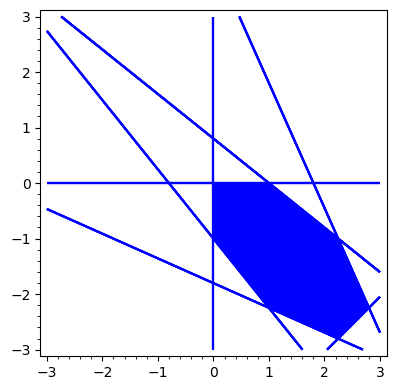

In [46]:
var('x, y')

def next_line(l: Tuple[K, K, K]) -> Tuple[K, K, K]:
    A, B, C = l # using large letters because smol a is taken
    A_, B_ = (B, -A + a*B)
    return (A_, B_, C - A_)

line = (0, 1, 0)
p = [polygon(DOTS)]
for i in range(30):
    p.append(implicit_plot(RR(line[0])*x+RR(line[1])*y+RR(line[2]), (x, -3, 3), (y, -3, 3)))
    line = next_line(line)

sum(p)

In [58]:
a

a

#### line = next_line((a, 1, -1))
n = 1

while line != (a, 1, -1):
    line = next_line(line)
    n += 1

print(n)

In [29]:
def router(d: Tuple[K, K]):
    try:
        return trace_ob(d, 14)
    except NotImplementedError:
        return "0"

In [26]:
router(o2n((4.5, 4.5)))

'03625140362514'

In [2]:
EXEC = 10
STEP = 0.01
END = 10.0
DOT_SIZE = 0.01

rays = set((K(j), K(0)) for j in [1.0,1.0 + STEP,..,1.0 + END])
next_rays = rays.copy()

i = 0
for i in range(EXEC):
    print(i) # выводит количество произведённых итераций
    next_rays = set(map(ob_inv, next_rays))
    rays = rays.union(next_rays)

to_plot = [n2o(rotate(d, i)) for d in rays for i in Zmod(7)]

0
1
2
3
4
5
6
7
8
9


In [3]:
len(to_plot)

65807

In [33]:
# (3.1, -1.65) over 4_000_000
start_dot = (K(3.125), K(-3.195))
dot = start_dot
n = 1
while True:
    dot = ob(dot)
    if dot == start_dot:
        print(n)
        break
    else:
        n += 1
        if n % 10000 == 0:
            print(n)

10000
20000
30000
40000
48874


In [4]:
import plotly.graph_objects as go

layout = go.Layout(width=800, height=800)

f = go.FigureWidget([go.Scattergl(x=[1/i], y=[1/i], mode='markers', marker_size=1, name=i) for i in range(1, 100)], layout=layout)

f

FigureWidget({
    'data': [{'marker': {'size': 1},
              'mode': 'markers',
              'name': '1'…

In [28]:
import plotly.graph_objects as go
from itertools import product

x, y = zip(*to_plot)
x1, y1 = zip(*product([-15.0,-14.9,..,16.0], [-8.0,-7.9,..,8.0]))

layout = go.Layout(width=800, height=800)

f = go.FigureWidget([go.Scattergl(x=x, y=y, mode='markers', marker_size=1),
                     go.Scattergl(x=x1, y=y1, mode='markers+text', marker_size=1)], layout=layout)
N = len(x1)


scatter = f.data[1]
scatter.marker.size = [1] * N
scatter.marker.color = ["#aaaaee"] * N
scatter.text = [""] * N
scatter.textposition = "bottom center"
f.layout.hovermode = 'closest'

# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    t = list(scatter.text)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        t[i] = router(o2n((RR(points.xs[0]), RR(points.ys[0]))))
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
            scatter.text = t


scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'size': 1},
              'mode': 'markers',
              'type': 'sc…

In [34]:
from itertools import product
def get_color(s: int):
    s = int(s)
    return f"rgb({s % 256}, {(s // 256) % 256}, {(s // 65536) % 256})"

x, y = zip(*to_plot)
x1, y1, routes = zip(*[(x, y, router(o2n((RR(x), RR(y))))) for x, y in product([-15.0,-14.9,..,16.0], [-8.0,-7.9,..,8.0])])
colors = list(map(get_color, routes))

TypeError: not all arguments converted during string formatting

In [43]:
import plotly.graph_objects as go

layout = go.Layout(width=800, height=800)

f = go.FigureWidget([go.Scattergl(x=x, y=y, mode='markers', marker_size=1),
                     go.Scattergl(x=x1, y=y1, mode='markers', marker_size=1, text=routes)], layout=layout)

f.data[1].marker.color = colors

f

FigureWidget({
    'data': [{'marker': {'size': 1},
              'mode': 'markers',
              'type': 'sc…

In [42]:
f.write_html('colorful_plot.html')

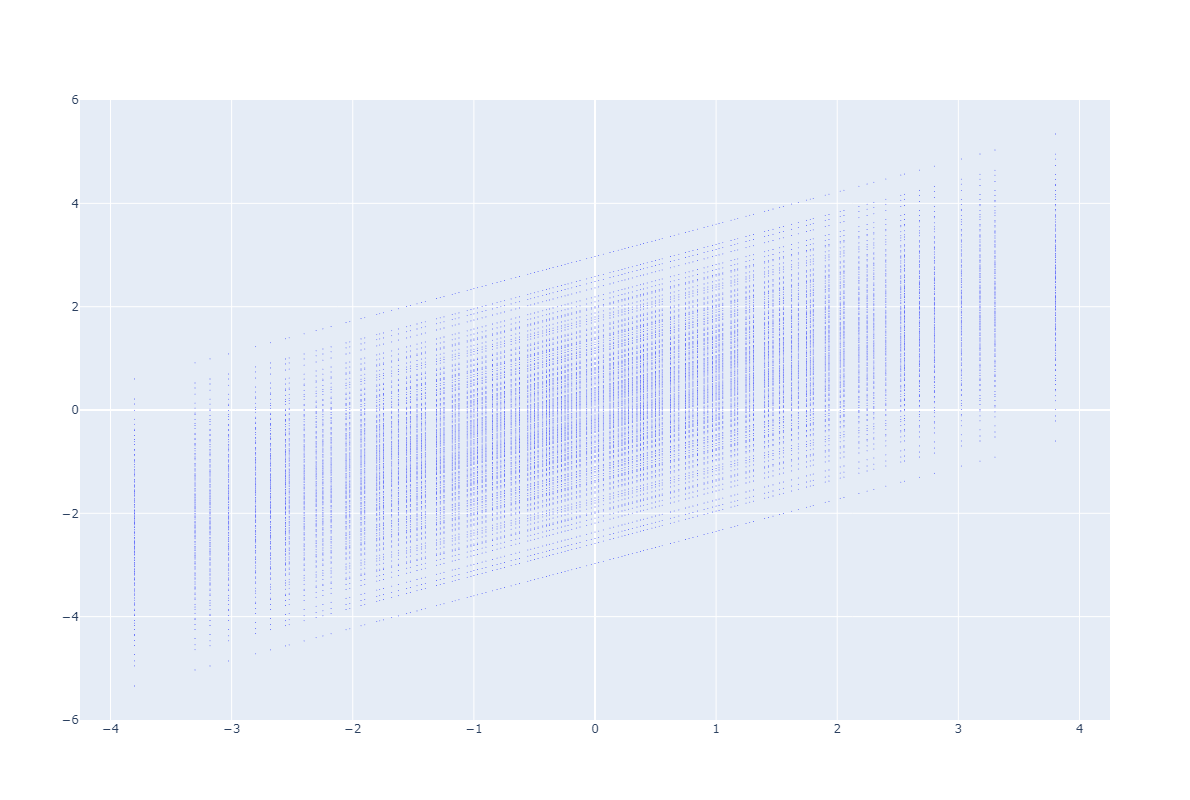

In [107]:
# _g = map(lambda d: (RR(d[0]), RR(d[1])), g)
_g = map(n2o, g)
x, y = zip(*_g)
N = len(g)

layout = go.Layout(width=800, height=800)

f = go.FigureWidget([go.Scattergl(x=x, y=y, mode='markers', marker_size=1.2)], layout=layout)
f.show()

In [4]:
f.write_html('test_plotly.html')

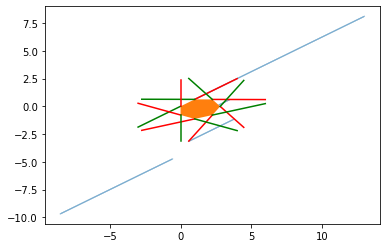

In [38]:
import matplotlib.pyplot as plt

EXEC_TIME = 60
STEP = 0.01
END = 3.0
DOT_SIZE = 0.01

rays = set((K(j), K(0)) for j in [1.0,1.0 + STEP,..,10.0 + END])
# ----
next_rays = map(ob_inv, rays)
rays = rays.union(next_rays)

plt.scatter(*zip(*map(n2o, rays)), [DOT_SIZE]*len(rays), marker='.')
plt.fill(*zip(*map(n2o, DOTS)))

for i in Zmod(7):
    dot_1 = n2o(rotate((1.0, 0.0), i))
    dot_2 = n2o(rotate((1.0 + END, 0.0), i))
    dot_1_i = n2o(rotate((0.0, 0.0), i))
    dot_2_i = n2o(rotate((-END, 0.0), i))
    plt.plot(*zip(dot_1, dot_2), c='red')
    plt.plot(*zip(dot_1_i, dot_2_i), c='green')

plt.show()

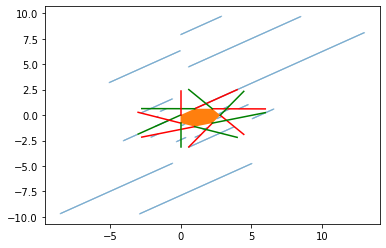

In [41]:
next_rays = map(ob_inv, rays)
rays = rays.union(next_rays)

plt.scatter(*zip(*map(n2o, rays)), [DOT_SIZE]*len(rays), marker='.')
plt.fill(*zip(*map(n2o, DOTS)))

for i in Zmod(7):
    dot_1 = n2o(rotate((1.0, 0.0), i))
    dot_2 = n2o(rotate((1.0 + END, 0.0), i))
    dot_1_i = n2o(rotate((0.0, 0.0), i))
    dot_2_i = n2o(rotate((-END, 0.0), i))
    plt.plot(*zip(dot_1, dot_2), c='red')
    plt.plot(*zip(dot_1_i, dot_2_i), c='green')

plt.show()

In [49]:
from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
)
from ipywidgets import Label, VBox

sc_x = LinearScale()
sc_y = LinearScale()

scat = Scatter(x=[0], y=[0], scales={'x': sc_x, 'y': sc_y}, colors=['orange'],
               enable_move=True)

with scat.hold_sync():
    scat.enable_move = False
    scat.interactions = {'click': 'add'}

ax_x = Axis(scale=sc_x)
ax_y = Axis(scale=sc_y, tick_format='0.2f', orientation='vertical')

fig = Figure(marks=[scat], axes=[ax_x, ax_y])
fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale(), tick_format='0.2f')]…

In [4]:
from itertools import product

def gon_range(delta : K, number):
    return sorted([(delta*i + a*delta*j + a^2*delta*k) for i, j, k in product(*([range(-number, number+1)] * 3))])

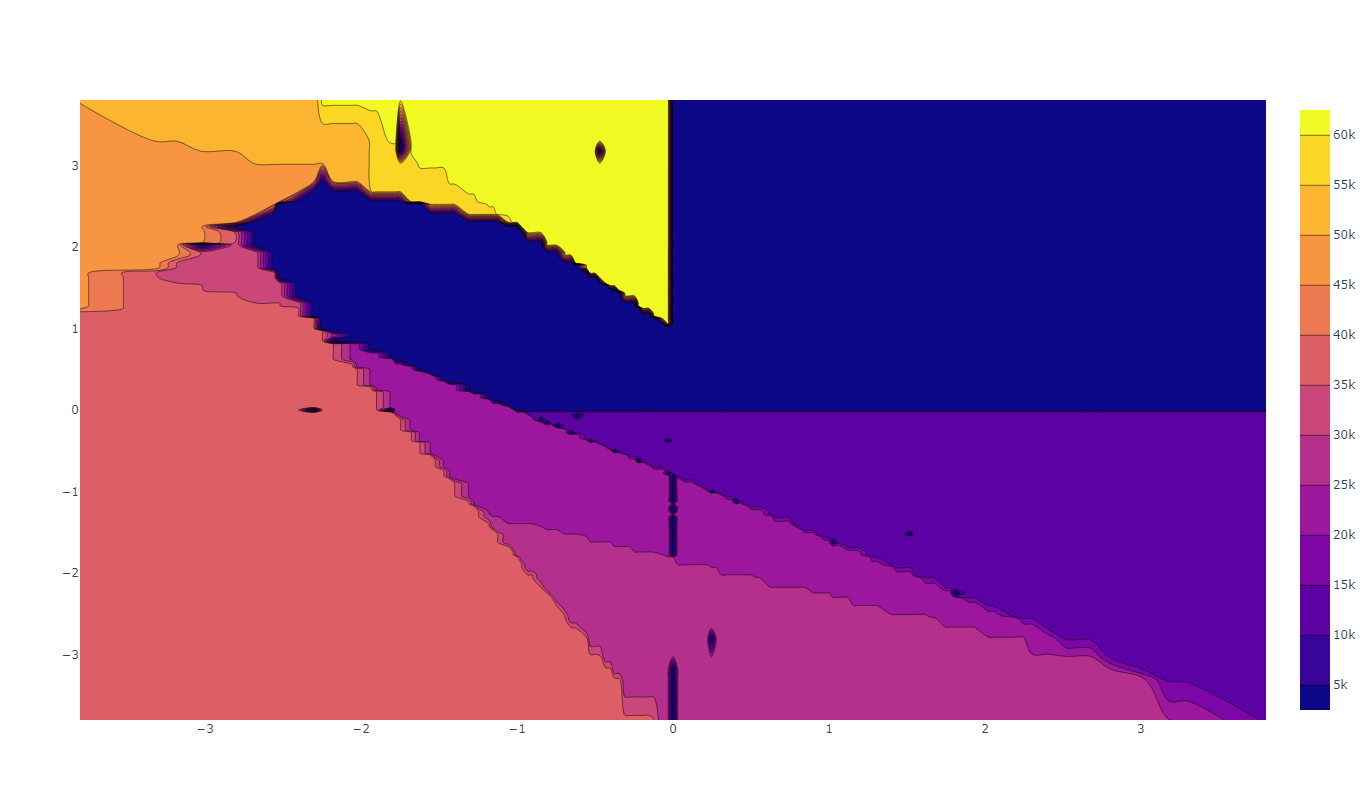

In [23]:
import numpy as np
from multiprocessing import Pool
import plotly.graph_objects as go

x = gon_range(0.01, )
y = x
N = len(x)
z = [[i*N + j for j in range(N)] for i in range(N)]

def mutz(arr):
    return list(map(lambda ij: router(x[ij // N], y[ij % N]), arr))
    
with Pool() as pool:
    z = pool.map(mutz, z)

x = list(map(RR, x))
y = x

layout = go.Layout(width=800, height=800)
fig = go.Figure(data =
    go.Contour(
        z=z,
        x=x, # horizontal axis
        y=y # vertical axis
    ), layout=layout)
fig.show()

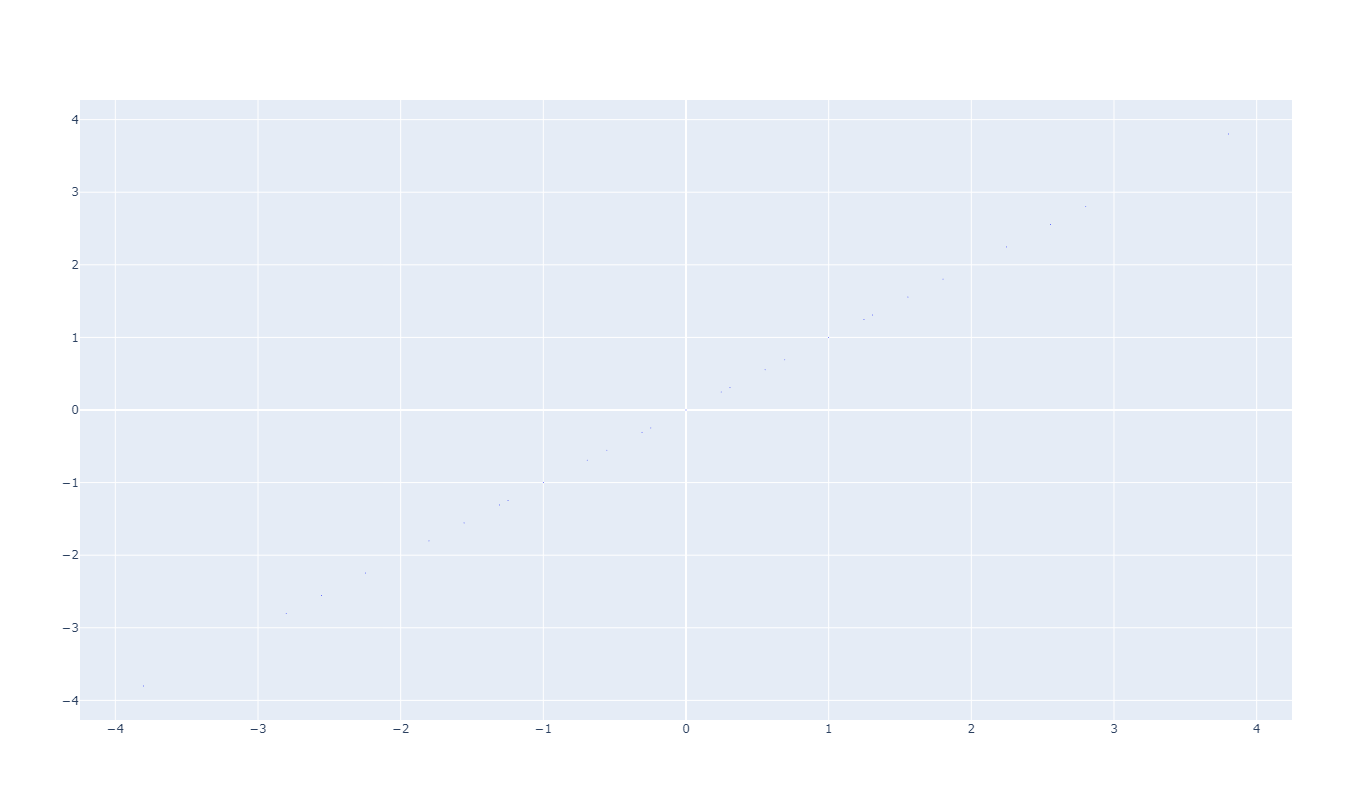

In [18]:
layout = go.Layout(width=800, height=800)

f = go.FigureWidget([go.Scattergl(x=list(map(RR, x)), y=list(map(RR, y)), mode='markers', marker_size=1.2)], layout=layout)
f.show()

In [31]:
!npm --version

/usr/bin/sh: npm: command not found


In [32]:
!

/usr/bin/sh: conda: command not found
